<a href="https://colab.research.google.com/github/mohanaditya910/SalesKen.ai-data_scientist/blob/master/part2/part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:


import re
import string
import pandas as pd
from functools import reduce
from math import log

In [0]:
from google.colab import drive
drive.mount ('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%cd /content/drive/My\ Drive/SaleskenProblemSolving-master


/content/drive/My Drive/SaleskenProblemSolving-master


In [0]:
%ls


Correct_cities.csv  list_of_sentences  Misspelt_cities.csv  README.md


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [0]:
df=pd.read_csv("list_of_sentences",header=None,)
#df.reanme(columns='')

In [0]:
df

,0
0,good morning
1,how are you doing ?
2,the weather is awesome today
3,samsung
4,good afternoon
5,baseball is played in the USA
6,there is a thunderstorm
7,are you doing good ?
8,"The polar regions are melting"""
9,apple


In [0]:
len(df)

13

In [0]:
corpus=[]
for i in range(len(df)):
  corpus.append(df.iloc[i][0])

In [0]:
corpus

['good morning',
 'how are you doing ?',
 'the weather is awesome today',
 'samsung',
 'good afternoon',
 'baseball is played in the USA',
 'there is a thunderstorm ',
 'are you doing good ?',
 'The polar regions are melting"',
 'apple',
 'nokia',
 'cricket is a fun game',
 'the climate change is a problem']

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
###########removing stop words...
from nltk.corpus import stopwords
cachedStopWords = stopwords.words("english")

stop_words = set(stopwords.words('english'))
'''
def testFuncNew(text):
  #text = 'hello bye the the hi'
  text = ' '.join([word for word in text.split(" ") if word not in cachedStopWords])
'''
def testFuncNew(text):
  #text = 'hello bye the the hi'
  #print (text.split(" "))
  text = ' '.join([word for word in text.split(" ") if word not in stop_words])
  return text


reform_corpus=[]
for text in corpus:
  #print (testFuncNew(text))
  reform_corpus.append(testFuncNew(text))
reform_corpus




['good morning',
 '?',
 'weather awesome today',
 'samsung',
 'good afternoon',
 'baseball played USA',
 'thunderstorm ',
 'good ?',
 'The polar regions melting"',
 'apple',
 'nokia',
 'cricket fun game',
 'climate change problem']

In [0]:
def preprocessing(line):
    line = line.lower()
    line = re.sub(r"[{}]".format(string.punctuation), " ", line)
    return line

In [0]:
tfidf_vectorizer = TfidfVectorizer(preprocessor=preprocessing)
tfidf = tfidf_vectorizer.fit_transform(corpus)

In [0]:
print (tfidf)

  (0, 16)	0.7943567727279524
  (0, 11)	0.6074514940480699
  (1, 8)	0.49200688757309974
  (1, 29)	0.49200688757309974
  (1, 2)	0.43629162556341305
  (1, 12)	0.570533138936291
  (2, 26)	0.508467355758347
  (2, 3)	0.508467355758347
  (2, 14)	0.3188456574856306
  (2, 28)	0.508467355758347
  (2, 23)	0.3503145601982594
  (3, 22)	1.0
  (4, 0)	0.7943567727279524
  (4, 11)	0.6074514940480699
  (5, 27)	0.45324156231303064
  (5, 13)	0.45324156231303064
  (5, 18)	0.45324156231303064
  (5, 4)	0.45324156231303064
  (5, 14)	0.28421510702487285
  (5, 23)	0.31226610079708117
  (6, 25)	0.6464110157590537
  (6, 24)	0.6464110157590537
  (6, 14)	0.40534626852938604
  (7, 8)	0.5290573057385657
  (7, 29)	0.5290573057385657
  (7, 2)	0.46914642409875607
  (7, 11)	0.46914642409875607
  (8, 15)	0.49632543216610014
  (8, 21)	0.49632543216610014
  (8, 19)	0.49632543216610014
  (8, 23)	0.34194923924892334
  (8, 2)	0.37954435041571133
  (9, 1)	1.0
  (10, 17)	1.0
  (11, 10)	0.5428677390993116
  (11, 9)	0.542867739099

In [0]:
kmeans = KMeans(n_clusters=4).fit(tfidf)

In [0]:
lines_for_predicting = corpus# ["motorola","good evening"]

predicted=kmeans.predict(tfidf_vectorizer.transform(lines_for_predicting))
print (predicted)

[0 3 1 0 0 1 1 3 2 0 0 1 1]


In [0]:
# i percieved 4 classes and truth labels..
#these labels are for this run only..if we run it will change..
import numpy as np
import sklearn
truth_labels = np.array([3,3,1,0,3,2,1,3,1,0,0,2,1]).astype(np.int32)

acc = sklearn.metrics.accuracy_score(truth_labels,predicted)
print("accuracy: {}".format(acc))


accuracy: 0.6153846153846154


Text(89.18, 0.5, 'predicted label')

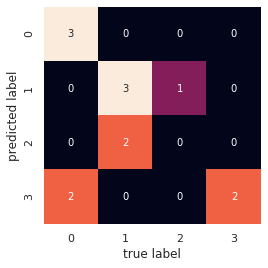

In [0]:
import seaborn as sns; sns.set() 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(predicted, truth_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            #xticklabels=,
            #yticklabels=
            )
plt.xlabel('true label')
plt.ylabel('predicted label')


#plesantaries,climate,mobiles,games,

trying other method..

In [0]:
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [0]:
def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]

    with open( os.path.join(path, file_name) ,"r") as fin:
        for line in fin.readlines():
            text = line.strip()
            documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles    

In [0]:
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

In [0]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [0]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [0]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [0]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

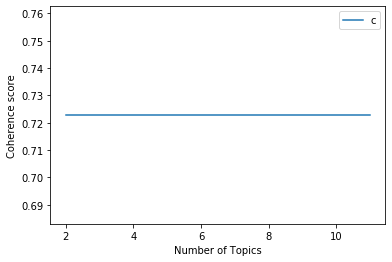

In [0]:
start,stop,step=2,12,1
plot_graph(clean_text,start,stop,step)

In [0]:
# LSA Model
number_of_topics=3
words=3
document_list,titles=load_data("","list_of_sentences")
clean_text=preprocess_data(document_list)
model=create_gensim_lsa_model(clean_text,number_of_topics,words)

Total Number of Documents: 13
[(0, '-0.888*"good" + -0.325*"morn" + -0.325*"afternoon"'), (1, '0.339*"basebal" + 0.339*"usa" + 0.339*"play"'), (2, '-0.344*"today" + -0.344*"awesom" + -0.344*"weather"')]
